In [1]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use('seaborn-white')

In [3]:
contour_thres = np.load('/Users/linggeli/monte_carlo/data/penalty_normal_contour_thres_68.npy')

In [16]:
from helper import load_fitted_contour
from utils import *
from plot import *
from approximation import *

In [5]:
contour_stat = load_fitted_contour('/Users/linggeli/monte_carlo/data/penalty_normal/contour_normal_fit_100.txt')

In [6]:
data = grid_to_data(contour_thres)
all_points = data[:, 0:2]
target = data[:, 2]
print(all_points.shape)
print(target.shape)

(400, 2)
(400,)


In [7]:
lr_stats = grid_to_data(contour_stat)[:, 2]

In [8]:
gp, current_indices = intialize_model(all_points, target, 20)  

In [9]:
gp, current_indices, scores, hat = update_model(gp, current_indices, 20, all_points, target, lr_stats)
mean_grid, conf_grid = update_results(hat, current_indices, target, lr_stats)

In [10]:
selected = np.zeros(target.shape[0])
selected[current_indices] = 1 

In [11]:
scores_pct = np.argsort(np.argsort(scores)) * 100.0 / (len(scores) - 1)
score_grid = data_to_grid(scores_pct, 20)

In [12]:
hat_grid = data_to_grid(hat, 20)

In [13]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

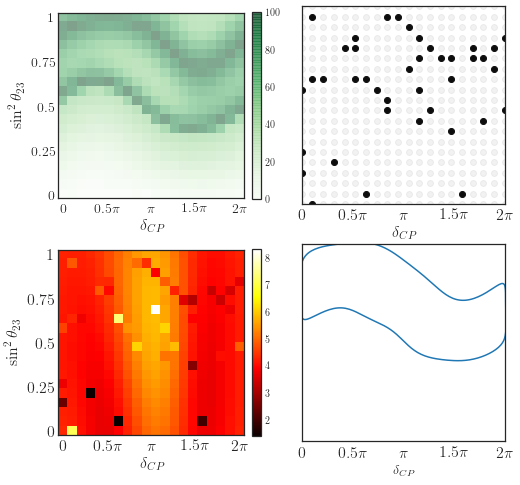

In [15]:
fig = plt.figure(figsize=(8, 8))

plt.subplot(221)
im1 = plt.imshow(np.flip(score_grid, axis=0), cmap='Greens', interpolation='none', alpha=0.5)
plt.colorbar(im1, fraction=0.046, pad=0.04)
x_min = 0
x_max = score_grid.shape[0] - 1
y_min = 0
y_max = score_grid.shape[1] - 1
plt.xticks([x_min, x_min + 0.25 * (x_max - x_min), 0.5 * (x_min + x_max), x_min + 0.75 * (x_max - x_min), x_max], 
           [r'$0$', r'$0.5\pi$', r'$\pi$', r'$1.5\pi$', r'$2\pi$'], fontsize=14)
plt.yticks([y_min, y_min + 0.25 * (y_max - y_min), 0.5 * (y_min + y_max), y_min + 0.75 * (y_max - y_min), y_max], 
           [r'$1$', r'$0.75$', r'$0.5$', r'$0.25$', r'$0$'], fontsize=14)
plt.xlabel(r'$\delta_{CP}$', fontsize=16)
plt.ylabel(r'$\sin^2{\theta_{23}}$', fontsize=16)

plt.subplot(222)
plt.scatter(all_points[selected == 1, 1], all_points[selected == 1, 0], color='black')
plt.scatter(all_points[:, 1], all_points[:, 0], color='gray', alpha=0.1)
x_min = np.min(all_points[:, 1])
x_max = np.max(all_points[:, 1])
y_min = np.min(all_points[:, 0])
y_max = np.max(all_points[:, 0])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks([x_min, x_min + 0.25 * (x_max - x_min), 0.5 * (x_min + x_max), x_min + 0.75 * (x_max - x_min), x_max], 
           [r'$0$', r'$0.5\pi$', r'$\pi$', r'$1.5\pi$', r'$2\pi$'], fontsize=16)
#plt.yticks([y_min, y_min + 0.25 * (y_max - y_min), 0.5 * (y_min + y_max), y_min + 0.75 * (y_max - y_min), y_max], 
#           [r'$0$', r'$0.25$', r'$0.5$', r'$0.75$', r'$1$'], fontsize=14)
plt.yticks([], [])
plt.xlabel(r'$\delta_{CP}$', fontsize=16)

plt.subplot(223)
im2 = plt.imshow(np.flip(hat_grid, axis=0), cmap='hot', interpolation='none')
plt.colorbar(im2, fraction=0.046, pad=0.04)
x_min = 0
x_max = hat_grid.shape[0] - 1
y_min = 0
y_max = hat_grid.shape[1] - 1
plt.xticks([x_min, x_min + 0.25 * (x_max - x_min), 0.5 * (x_min + x_max), x_min + 0.75 * (x_max - x_min), x_max], 
           [r'$0$', r'$0.5\pi$', r'$\pi$', r'$1.5\pi$', r'$2\pi$'], fontsize=16)
plt.yticks([y_min, y_min + 0.25 * (y_max - y_min), 0.5 * (y_min + y_max), y_min + 0.75 * (y_max - y_min), y_max], 
           [r'$1$', r'$0.75$', r'$0.5$', r'$0.25$', r'$0$'], fontsize=16)
plt.xlabel(r'$\delta_{CP}$', fontsize=16)
plt.ylabel(r'$\sin^2{\theta_{23}}$', fontsize=16)

plt.subplot(224)
n = 40
plot_smooth_contour(data_to_grid(lr_stats, 20), hat_grid, n)
x_min = 0
x_max = n - 1
y_min = 0
y_max = n - 1
plt.xticks([x_min, x_min + 0.25 * (x_max - x_min), 0.5 * (x_min + x_max), x_min + 0.75 * (x_max - x_min), x_max], 
           [r'$0$', r'$0.5\pi$', r'$\pi$', r'$1.5\pi$', r'$2\pi$'], fontsize=16)
plt.yticks([], [])
#plt.yticks([y_min, y_min + 0.25 * (y_max - y_min), 0.5 * (y_min + y_max), y_min + 0.75 * (y_max - y_min), y_max], 
#           [r'$0$', r'$0.25$', r'$0.5$', r'$0.75$', r'$1$'], fontsize=14)
plt.xlabel(r'$\delta_{CP}$', fontsize=14)
#plt.ylabel(r'$\sin^2{\theta_{23}}$', fontsize=14)
#plt.savefig('iteration.png')
plt.show()